In [ ]:
import datatable as dt
import pandas as pd
from tqdm import tqdm
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from collections import Counter
from ArticutAPI import Articut

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Legal-tech/data/parse.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,court,date,no,reason,judgement,type,historyHash,mainText,relatedIssues,party,new_relatedIssues,new_reason,maxpenalty,year,plaintiff_lawyer,defendant_lawyer,truth
0,0,0,福建金門地方法院,2020-09-26T00:00:00+08:00,"108,易,28",傷害等,福建金門地方法院刑事判決 108年度易字第28號\r\n公 訴 人 福建金門地...,判決,NaN,洪繹凱犯恐嚇危害安全罪，累犯，處有期徒刑柒月，又犯傷害罪，累犯，處有期徒刑玖月，應執行有期徒...,"[{'lawName': '中華民國刑法', 'issueRef': '2'}, {'law...","[{'group': ['plaintiff'], 'title': '公訴人', 'val...","[{'lawName': '中華民國刑法', 'issueRef': '2'}, {'law...",{'公共危險罪'},14,2020,False,False,"{'exec_time': 1.8590755462646484, 'result_pos'..."
1,1,1,福建金門地方法院,2012-08-23T00:00:00+08:00,"101,訴,6",殺人未遂,福建金門地方法院刑事判決 101年度訴字第6號\r\n公 訴 人 福建金門地方...,判決,NaN,楊子珅犯重傷未遂罪，處有期徒刑參年陸月，扣案如附表所示之物均沒收。,"[{'lawName': '中華民國刑法', 'issueRef': '25 2'}, {'...","[{'group': ['plaintiff'], 'title': '公訴人', 'val...","[{'lawName': '中華民國刑法', 'issueRef': '25 2'}, {'...","{'傷害罪', '殺人罪'}",42,2012,False,True,"{'exec_time': 2.236091136932373, 'result_pos':..."
2,2,2,福建金門地方法院,2017-12-28T00:00:00+08:00,"106,侵訴,4",妨害性自主,福建金門地方法院刑事判決 106年度侵訴字第4號\r\n公 訴 人 福建金門地方...,判決,5d69b717cde13bb128573b92,乙○○現役軍人犯乘機性交罪，處有期徒刑貳年。緩刑伍年，緩刑期間付保護管束，並應於本判決確定後...,"[{'lawName': '中華民國刑法', 'issueRef': '10 5 1'}, ...","[{'group': ['plaintiff'], 'title': '公訴人', 'val...","[{'lawName': '中華民國刑法', 'issueRef': '10 5 1'}, ...","{'搶奪強盜及海盜罪', '恐嚇及擄人勒贖罪', '妨害性自主罪'}",24,2017,False,True,"{'exec_time': 1.3598172664642334, 'result_pos'..."
3,3,3,福建金門地方法院,2017-10-06T00:00:00+08:00,"106,侵訴,2",妨害性自主,福建金門地方法院刑事判決 106年度侵訴字第2號\r\n公 訴 人 福建金門地方...,判決,5d65d481cde13bb128d61fc9,甲○○犯乘機性交罪，累犯，處有期徒刑參年貳月。,"[{'lawName': '中華民國刑法', 'issueRef': '10 5'}, {'...","[{'group': ['plaintiff'], 'title': '公訴人', 'val...","[{'lawName': '中華民國刑法', 'issueRef': '10 5'}, {'...","{'搶奪強盜及海盜罪', '恐嚇及擄人勒贖罪', '妨害性自主罪'}",38,2017,False,True,"{'exec_time': 1.3772978782653809, 'result_pos'..."
4,4,4,福建金門地方法院,2016-12-08T00:00:00+08:00,"105,侵訴,1",妨害性自主,福建金門地方法院刑事判決 105年度侵訴字第1號\r\n公 訴 人 福建金門地方...,判決,5d669863cde13bb12885d6fc,乙○○對未滿十四歲女子犯強制性交罪，處有期徒刑玖年。,"[{'lawName': '中華民國刑法', 'issueRef': '10 5'}, {'...","[{'group': ['plaintiff'], 'title': '公訴人', 'val...","[{'lawName': '中華民國刑法', 'issueRef': '10 5'}, {'...","{'搶奪強盜及海盜罪', '恐嚇及擄人勒贖罪', '妨害性自主罪'}",108,2016,False,True,"{'exec_time': 1.0526225566864014, 'result_pos'..."


In [ ]:
len(df)

4282

## TFIDF

In [ ]:
username = "wwdu@gapp.nthu.edu.tw"
apikey = "xxxxxx"
articut = Articut(username, apikey)

In [ ]:
inputSTR = df['truth'][0:2]
resultDICT = []
ans = []
for i in range(len(inputSTR)):
  text = articut.parse(inputSTR[i]) 
  tfidfLIST_extract_tags = articut.analyse.extract_tags(text, topK = 10, withWeight = False, allowPOS = ('vn', 'v'))
  ans.append(tfidfLIST_extract_tags) 
# tfidfLIST_extract_tags = articut.analyse.extract_tags(resultDICT, topK = 10, withWeight=True, allowPOS = ('vn', 'v'))
# tfidfLIST_textrank = articut.analyse.textrank(resultDICT, topK = 10)
print(ans)

[[' ', '李憲瑋', '某', '洪繹', '凱', '傷害', '你', '身體', '晚上', '吐氣'], [' ', '吳欣瑜', '楊子珅', '金門', '變裝', '金城鎮', '球棒', '向', '原', '臺南']]


In [ ]:
# articut.analyse.TFIDF(idf_path=df['truth'][1])
articut.analyse.TFIDF(idf_path=None)

idf dict import error.
[Errno 2] No such file or directory: '/usr/local/lib/python3.7/dist-packages/ArticutAPI/Toolkit/data//content/drive/Shareddrives/Legal-tech/data/new_truth_data.csv'


In [ ]:
tfidfLIST_extract_tags = articut.analyse.extract_tags(resultDICT[1], topK = 10, withWeight = False)
print(tfidfLIST_extract_tags)
articut.analyse.TFIDF(idf_path=None)

[' ', '吳欣瑜', '楊子珅', '金門', '變裝', '金城鎮', '球棒', '向', '原', '臺南']


## 斷詞

In [ ]:
import ast
res = ast.literal_eval(str(df['truth'].iloc[1]))
parse = res["result_segmentation"].replace("/", " ")
print(parse)

  犯罪 事實   一 、 楊子珅 與 吳欣瑜 原 係 臺南 康寧 大學 （ 原 名立德 大學 ） 之 同學   兼 室友 ， 楊子珅 因 與 女友 「 朱曉倩 」 間感情 不順 遂 ， 曾 於 電   話 中 向 已 在 金門 服役 之 吳欣瑜 傾訴 心事 ， 而 遭 吳欣瑜 掛斷 電   話 ， 致 心生不滿 。 竟 基 於 重傷害 之 犯意 ， 預 先購 妥供 變裝 使   用 之 黑色 口罩 、 墨鏡 、 帽子 、 手套 、 休閒 褲 及 藍 白 拖鞋 等 物   品 ， 於 民國 101年 3月 2日 上午 9時 50分 許 ， 自 臺南 搭乘 立榮航   空公司 班 機 抵達 金門 ， 先 在 尚 義機場 航空 站 ， 向 「 冠城 租 車   行 」 店員 蔡耀萱 ， 以 新臺幣 （ 下同 ） 400元 租得 車牌號碼 005  - HKV 號 之 普通 重型 機車 乙輛 作為 交通工具 ， 並 在 騎 往 金城鎮   ○○路  150 號 「 金 龍體育 用品店 」 途 中 ， 先行 換穿 前揭 變裝   衣物 ， 再 向 該 體育 用品店店員 蔡曉菁 ， 以  500元 價格 購得 木   製 球 棒  1支 作為 兇器 ， 隨 後 將 上 開機車 暫時 停放 於 金城鎮 ○   ○○路 5 巷 12 弄 巷口 。 待 至 同日 下午 1時許 ， 楊子珅 穿著 變裝   衣物 ， 先 以 電話 聯繫 吳欣瑜 ， 確認 其 將 抵達 金城 公車站 後 ，   即 持 球棒 在 公車站 旁 埋伏 ， 俟見 吳欣瑜 與 其軍 中 同袍 陳崇孝   進入車 站 ， 旋 持 球棒 自 後尾 隨 ， 並 重擊 吳欣瑜 後 腦杓  1 下 ，   待 其 倒地 ， 再 以 球棒 毆擊 吳欣瑜 後 腦杓  1 下 ， 致 吳欣瑜 受有   頭部 及 右手掌 鈍 挫傷 等 傷害 ， 楊子珅 隨即 於 行兇 後 ， 迅速 逃   往 金城鎮 ○○○路  5 巷 12 弄 巷口 ， 並 駕駛 上 開機車 逃離 現場   。   二 、 案 經 吳欣瑜 訴 由 金門縣 警察局 金城分局 報請 福建 金門 地方法   院檢察署 檢察官 偵查 起訴 。   理   由  


In [ ]:
sentences = df[['truth']]
sentences
parse_lst = []
empty = 0
for i in range(len(sentences)):
  # inputSTR = sentences[i]
  # result = articut.parse(inputSTR, level="lv2", openDataPlaceAccessBOOL=False, wikiDataBOOL=False)
  # line = str(sentences.iloc[i])
  # if 'result_segmentation' in dict_name:
  #   line = line["result_segmentation"]
  # line = line.replace("/", " ")
  if df['truth'].iloc[i]!='<Response [504]>':
    res = ast.literal_eval(str(df['truth'].iloc[i]))
    if res:
      if 'result_segmentation' in res:
        parse = res["result_segmentation"].replace("/", " ")
      else:
        parse = ''
        empty = empty+1
    else:
      parse = ''
      empty = empty+1
  else:
    parse = ''
    empty = empty+1
  parse_lst.append(parse)
  df['truth'].iloc[i] = parse

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# print(len(sentences))
print(len(df['truth']))

4282


In [ ]:
# df['parse_truth'] = lst
df.to_csv("parse.csv")

# Jieba斷詞 + TF-IDF

In [ ]:
import jieba
sentences = error_truth_df['str']
# sentences = df['truth'][0:4283]
sent_words = [list(jieba.cut(sent0)) for sent0 in sentences]
document = [" ".join(sent0) for sent0 in sent_words]
print(document)

['  事   實   一 、 林國憲 、 賴錦彰 、 林振謙均 為 新北市 新 莊區 公所 （ 下稱 新莊   區 公所 ） 工務課 技士 ， 負責承辦 、 執行 新北市 新 莊區 轄 內 相   關 水利工程 契約 、 施工 管理 、 估驗 計價 、 驗收 等 業務 ， 均 為   依法 令服務 於 地方 自治 團體 所屬 機關 而 具有 法定 職務權 限 之   人 。 陳 明振 係 「 皇興衛生 企業 有限公司 」 （ 下稱 皇興 公司 ）   負責人 。 王麗雪為 陳 明振之妻 ， 負責 皇興 公司 財務 。 張家豪   於 民國 101   、 102   年間 為 皇興 公司 業務 經理 ， 負責 與 公務單   位 聯 繫 標 案 事宜 、 陪同 公務單 位驗 收等業務 。 孫惠玲 為 皇興   公司 行政主管 ， 負 責 製 作 投 標 所 需 文件 及 施工 日誌 、 土方 月   報等標 案驗 收所 需 之 各項 文件 。 邱 顯 勛 、 吳 文皇 、 李家 進均   為 皇興 公司 員工 ， 擔任 皇興 公司 得標 工程 之 工地 主任 ， 負責   工人 工作 分派 ， 並與 皇興 公司 雇用 之 清淤 工人 陳 劉邦 、 林順   良 、 郭永慶 、 曹榮貴 、 王明 生 、 李清國 ， 共同 負責 皇興 公司   所承攬 新北市 新 莊區 雨水 下水道 清淤 工程 之 現場 清淤 工作 。   黃 妍 榛 係 「 國強 建材 股份 有限公司 」 （ 下稱 國強 公司 ） 前負   責人 。 劉智平 係 國強 公司 派 駐 新竹 縣 大山 資源 回收 再 利用 砂   石廠 兼營 土石方 既有 處理場 （ 下稱 大山 砂石 場 ） 之 工地 主任   。 李佳容 為 國強 公司 行政 人員 ， 黃 妍 榛 、 劉智平 、 李佳容 均   負責 辦理國強 公司 之棄 土 收受 業務 。 楊添明 係 尚谷 營造 有限   公司 （ 下稱 尚谷 營造 ） 負責人 。 陳 進標 係 振成 水電 工程 有限   公司 （ 下 稱振成 水電 ） 負責人 。 陳 福教為 振成 水電 之 工地 主   任 。   二 、 101   年 南新莊 標案 、 102   年 南新莊 標案   ( 一 ) 新北 市政府 採購 處 於 101   年 4   月

In [ ]:
len(df)

4282

In [ ]:
index = 0
for i in error_lst:
  print(df['truth'][int(i)])
  df['truth'][int(i)] = document[index]
  index = index + 1

In [ ]:
error_lst = ['525','528','1250','1301','3092','3339','4072','4074']
error_truth_df = pd.DataFrame(error_lst)
error_truth_df['i'] = ""
error_truth_df['str'] = ""
index = 0
for i in error_lst:
  print(i)
  error_truth_df['i'][index] = i
  error_truth_df['str'][index] = df['old_truth'][int(i)]
  index = index + 1

525
528
1250
1301
3092
3339
4072
4074


In [ ]:
df['parse_rank10'] = ""
# corpus = [
#     'This is the first document.',
#     'This document is the second document.',
#     'And this is the third one.',
#     'Is this the first document?',
# ]
vectorizer = TfidfVectorizer(sublinear_tf=False, stop_words=None, token_pattern="(?u)\\b\\w+\\b", smooth_idf=True, norm='l2', min_df = 10, max_df = 0.8)
tfidf = vectorizer.fit_transform(df['truth'])
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())

word_vector = vectorizer.get_feature_names()
# print('word_vector: ', word_vector)

for i in range(len(df_tfidf)):
  df_ = df_tfidf.iloc[[i]].sort_values(by=[i],axis=1, ascending=False)
  lst = []
  for k in range(10):
    lst.append(df_.columns.values[k])
  df['parse_rank10'].iloc[i] = lst
  
  if i < 20:
    print(lst)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


['金門縣', '凱', 'l', '你', '開山', '晚上', '黑色', '某', '吐氣', '李']
['金門', '球棒', '話', '弄', '電', '衣物', '站', '作為', '巷口', '大學']
['男', 'a', '金門', '連', '士', '乙', '口交', '褲子', '約', '陰莖']
['a', '女', '金門縣', '酒店', '乙', '昏睡', '抗拒', '甲', '喝酒', '衣物']
['乙女', '陰部', '歲', '甲', '女子', '乙', '褲子', '陰', '房間', '福建']
['甲女', '辦公室', '撫摸', '將', '任職', '起身', '不要', '猥褻', '顧', '身體']
['2年', '逃逸', '肇事', '上訴', '金門縣', '玖月', '駕駛', '民權路', '慎', '業務過失']
['金門', '金門縣', '創傷', '第6', '醫院', '委', '骨折', '女友', '座', '往']
['介', '豪', '蔡', '器械', 'ktv', '製球棒', '鋁', '等', '分持', '聯絡']
['金門', '令', '保護', '我', '了', '神經', '術', '西瓜', '切割', '你']
['甲女', '丙', '本案', '房間', '金門', '金門縣', '福建', 'line', '晚間', '衣']
['自用', '小客車', '竊取', '00', '車門', '鑰匙', '忠於', '8時', '汽油', '號碼']
['新竹市', '000', '右轉', '騎乘', '機車', '普通', '傷害', '新竹', '號碼', '車牌']
['大貨車', '營造', '新竹縣', '有限', '肇事', '公司', '方', '新竹', '中正南路', '東寧路']
['國道', '小客貨車', '自用', '駕駛', '肇事', '受傷', '措施', '採取', '2公里', '必要']
['吉', '恐嚇', '新竹縣', '聯絡', '潮', '右轉', '毀損', '106年', '2', '生']
['月', '有期', '徒刑', '執行', '元', '判處', '確定', '罰

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model2 = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", min_df = 10, max_df = 0.8).fit(parse_lst)
print(tfidf_model2.vocabulary_)

In [ ]:
import csv
csv_file = "tfidf_vocabulary.csv"
with open('tfidf_vocabulary.csv', 'w') as f:
    for key in tfidf_model2.vocabulary_.keys():
        f.write("%s,%s\n"%(key,tfidf_model2.vocabulary_[key]))

In [ ]:
tfidf_model2.vocabulary_

# 輿情分析

In [ ]:
!pip install KeyMojiAPI

In [ ]:
from KeyMojiAPI import KeyMoji
# 若您是使用 Docker 版本，無須填入 username, keymoji_key 參數
username = "wwdu@gapp.nthu.edu.tw"
keymoji_key = "xxxxxx"
keymoji = KeyMoji(username=username, keymojiKey=keymoji_key)

inputSTR = "選我選我 我一定每案都判死 快你媽 隨便民進黨 我一定判你有罪！！！ 國民法官的選任程序不得公開 會不會又黑箱自己人? 我先用法律系畢業的資格混進去讓他們以為我廢死 到時候一定一堆人問怎麼逃避當國民法官 然後每案都判死 不錯！熬夜審法案的立委都辛苦了 我是法盲 選我選我 我有台灣價值 選我選我 有種出國民立委 我進去立法院幫打架 ，而國民法官的選任程序不得公開。 嘻嘻，大家都知道 來啊 大家來判死啊 鄉民不是很愛靠北恐龍法官 這三小？ 反正鄉民標準：沒有死刑，一律恐龍法官 選我啦，低薪社畜代表 應該排除陣頭藝術工作者 因為陣頭藝術工作者都是犯罪者 從政黨或團體.. 國民法官應該只有裁決罪刑是否成立 最後量刑還是法官 要假裝支持廢死才有辦法被選上嗎？ 你各位有黨籍或加入甚麼團體嗎 本版一堆資深鍵盤法官 請務必從這裡挑選人才 司法改革倒著走 國民IU 將軍，我一定判你有罪!! 我不懂邏輯可以當嗎？ 黨要的就一定要 國民法官會怎麼判江國慶案？國民法官怎麼產生的？ 有關係就沒關係  沒關係就有關係 推司法改革圓滿落幕 小英只花4年多就完成2016承諾 選我啊！只要是台女通姦我都一律判浸豬籠！台男一律輕放 培養衛兵一條龍 反正現在學生是主力 畢業剛好幫黨做事 會不會一堆吸毒的 詐欺的 黑色會的當國民法官阿 真期待 那就是藍綠派人當法官，還有各公會團體的頭 弱勢就去死吧 選我！犯罪的全部槍斃！ 不錯喔 可是還是坐等細節出來 怎麼不看日本國民法官嫌麻煩制度最後玩不起來 一堆八點檔看多的婆婆媽媽當法官... 到時候  黑箱和關說  會不會又滿天飛 大死刑時代來臨 當兵時國軍高層多腦殘，這好大喜功的政府就多腦殘 選我選我 我要判死刑 災難的開始 我先猜八掛死刑柯糞到法庭上只會像個俗仔(好好好我沒 大公審時代來臨 唯一死刑 意見)然後回家哭說法官又輕判 三年A班演一下 你不先提升整體國民對法基礎 直接選參與 完蛋了，抽到鄉民只會一律死刑 廢物法 讓你參觀而已就高潮了 你的意見法官完全不會採 光是跟這些人解釋一般法律原則我看一天就不見了 納有屁用 真的看法律系沒有欸 悲哀台灣司法 全民教召系列 培養台灣人的法學基礎太慢了   直接國民法官上場就對了 我是覺得台灣人大部分的素質不夠格當法官拉，大概沒實權 國民美眉 一邊嘴法官，換你自己的時候什麼屁都說不出來  美國人素質有比較好嗎dpp又自打臉　選前陪審制　自己上了再改推參審制 笑話 以後有台灣價值的 無罪合法化囉 參審制不會讓阿薩不魯的人去啦 鄉民別自以為自己有機會坐進 百分百見到市面 不敢講話嚇到尿褲子 去 紅燈右轉請判兩個死刑，謝謝。 我要當法官惹 這樣遇到思覺證照人 可以safe嘛? 這東西就是要不懂法律的平民伸張他們自己的正義啊 看看法律 沒黨證抽不到你啦 會不會跟教召一樣賽 讀多了變得多脫離現實 不要讀法律最好 選我 我全部唯一死刑 全面公審就是你們要的 自己吞 台灣的國民法官 應該要有與神溝通的能力  先準備擲筊 聞到完蛋的味道 被抽到可以說那天要出國嗎 所以哪有法案沒辦法過的 只有不想過的 我一定當庭嘴爆那些只會翻法條的廢物。叫法警架我出去 鄉民都只會嘴，真的要判死又不敢了 啊 法匠 要當的不用先考一下基本法律常識嗎 代表國民法官也要一起扛社會輿論的壓力 不過素質堪憂 沒有經過社會歷練，就能當？ 你就祈禱到法庭不會被人亂洨 選任程序不公開 林北一定判韓柯糞死刑 國民法官拒絕履行職務，得處新台幣3萬元以下罰鍰 國民法官是不是看看報紙就可以斷案了？ 唯一死刑啊 要是選到理盲濫情的人 有得玩了 不管犯人背景以及犯罪動機為何 都一律建議死刑 至少先考個法學緒論的東東吧 說好的陪審團制度呢 希望真的有篩選過 有頭有臉的學經歷 有懶人包嗎 起碼先幫有資格的國民上點法學的入門課吧 陪審團拜拜 垃圾民進黨 好耶 淡化恐龍法官的濃度 篩選過的  都是有良好互動關係的好人 就不要被選上都有黨證 這制度只是幫政府擺脫輿論壓力而已 選任不公開CC 準備用行政玩爆司法 法白最近幾期有談到詳情，有興趣可參考 況且台灣少子化以後是＋9國度，真的對這種東東有信心？ 只是幫忙分擔法官的壓力 我會判狗頭鍘伺候 政府:什麼?判決不滿意?你看判決有民眾參與喔 大概就醬 殺人現行犯 我通通死刑 ㄏㄏ 出問題就會說 這個是國民法官跟法官的共同決定 爽啊刺啊 狼人殺預備 選人程序不公開 我以為我來到中國 跟國安法一樣 台灣不需要陪審團拔 台灣杜絕司法獨裁的第一步  是好事  法律人太垃圾了 若國民法官擔任良好，可以轉正嗎？ 六法全書 唯一死刑 為啥是從政黨或團體推薦的名冊選 磊哥：我要當法官 現在的法院判決往往是一贏一輸，或是雙輸，如果納入外部觀點，或許能夠創造win-win的良好判決。對啊，如果民事糾紛，國民法官判一判結果判出個死刑不是很搞笑嗎？不得公開？獨裁的開始 殺人犯 酒駕 直接判死刑 這我一定判死 美國某些州的陪審制度好像是有一群陪審員 然後讓辯護方與起訴方共同遴選 只要有一方不同意就可以不錄用 台灣的遴選制度是依靠政黨或團體派人遴選？一開始大家很期待當法官 去了之後開始發現判案沒那麼簡單，法官也覺得很幹 開始找逃避懶人包 我猜五年後就改回來了 給我來判，我一定判死刑 美國就是陪審制啊...江國慶給國民法官判一定死刑 六點下班九點繼續上班  選任不公開？哦...沒事看錯了  沒看到分參審制與陪審制 參審制的問題一眼就看得出來了 ㄏㄏ 線上鍵盤辦案跟實際還是不一樣啦～到法院現場每個人都會變超和平理性的，除非法官真的很爛 大陪審時代來臨 陪審太危險了  呵呵~選任程序不公開~司法官好歹有經過國考 將軍我一定判你有罪，狗~頭~~鍘~~~ 選我選我 這樣不會有宗教團體、偏激團體、政治正確團體、有大黨顏色政黨在那邊佔著嗎 垃圾法匠終於不再獨大，恐龍去死  先要求國民法官不要搞笑 23歲可任國民法官不會太年輕嗎？起碼有點社會經驗體認要26歲吧！ 將軍 我一定判你有罪  說好的陪審制掰掰，幹你娘資進黨 法盲當法官 嘻嘻 我要代替月亮懲罰你 看八卦板一堆法盲，陪審制誰敢用 垃圾dpp完全沒有誠信可言XD  一堆法律人又跑出來了.國考生哭哭 根本內定 當司法不再被人民信任, 談什麼法都是笑死人 我覺得要30歲以上，有點社會歷練  民進黨不是說要陪審怎麼變參審？又一個雙標跳票 國民法官的選任程序不得公開，那誰監督？ 所以能拿多少錢 背景人物而已要啥體認，跟同婚一樣出個閹割法出來擋賠審的 所以8+9也可以去？ 能鼓掌跟發出罐頭笑聲就好了 好啊  來啊  不用設學歷門檻? +9也能當國民法官? 選人怎麼選 對台灣素質充滿了不信任感 選我 我通通死刑  不是說恐龍法官嗎哈哈哈感覺國民法官就只是坐在上面看戲而已，沒啥實權，被法官花言巧語一下，就信服了 學店顧客在那裝高級，科科 其實是：不選我當法官就是恐龍法官 原本支持陪審，可是看到還有那麼多韓粉和KMT支持者， 想了下，還是先參審好了，洗腦教育的影響比想像中嚴重 "
sense2Result = keymoji.sense2(inputSTR)
sense8Result = keymoji.sense8(inputSTR)
tensionResult = keymoji.tension(inputSTR)
print(sense2Result)

{'status': True, 'msg': 'Success!', 'results': [{'score': 0.0, 'sentiment': 'neutral', 'input_str': '選我選我', 'cursing': False}, {'score': -0.8234, 'sentiment': 'negative', 'input_str': '我一定每案都判死', 'cursing': False}, {'score': -0.025, 'sentiment': 'neutral', 'input_str': '快你媽', 'cursing': True}, {'score': -0.5, 'sentiment': 'negative', 'input_str': '隨便民進黨', 'cursing': False}, {'score': -0.1679, 'sentiment': 'neutral', 'input_str': '我一定判你有罪', 'cursing': False}, {'score': -0.34, 'sentiment': 'negative', 'input_str': '國民法官的選任程序不得公開', 'cursing': False}, {'score': -0.255, 'sentiment': 'negative', 'input_str': '會不會又黑箱自己人', 'cursing': False}, {'score': -0.7994, 'sentiment': 'negative', 'input_str': '我先用法律系畢業的資格混進去讓他們以為我廢死', 'cursing': False}, {'score': -0.0759, 'sentiment': 'neutral', 'input_str': '到時候一定一堆人問怎麼逃避當國民法官', 'cursing': False}, {'score': -0.8234, 'sentiment': 'negative', 'input_str': '然後每案都判死', 'cursing': False}, {'score': 0.4, 'sentiment': 'positive', 'input_str': '不錯', 'cursing': Fa

In [ ]:
example_str = '災難的開始 弱勢就去死吧 犯罪的全部槍斃！'
sense2Result_ = keymoji.sense2(example_str)
result = keymoji.keymoji2visual(sense2Result_)
print(result)

{'status': True, 'msg': 'Success!', 'sense': 'sense2'}


In [ ]:
example_str = '我是覺得台灣人大部分的素質不夠格當法官拉 一邊嘴法官，換你自己的時候什麼屁都說不出來 不用設學歷門檻? +9也能當國民法官?'
sense8Result_ = keymoji.sense8(example_str)
result = keymoji.keymoji2visual(sense8Result_)
print(result)

{'status': True, 'msg': 'Success!', 'sense': 'sense8'}


In [ ]:
score = 0
for i in range(len(sense2Result['results'])):
  score = score + sense2Result['results'][i]['score']
print(score)

-7.2000000000000055


In [ ]:
score = 0
neutral = 0
negative = 0
positive = 0
for i in range(len(sense2Result['results'])):
  sent = sense2Result['results'][i]['sentiment']
  if sent == 'neutral':
    neutral = neutral + 1
  elif sent == 'negative':
    negative = negative + 1
  elif sent == 'positive':
    positive = positive + 1
print('neutral: ', neutral)
print('negative: ', negative)
print('positive: ', positive)


neutral:  158
negative:  90
positive:  65


In [ ]:
# intialise data of lists.
data = {'sense2Result':['positive', 'neutral', 'negative'],
        'count':[65, 158, 90]}
 
# Create DataFrame
df = pd.DataFrame(data)

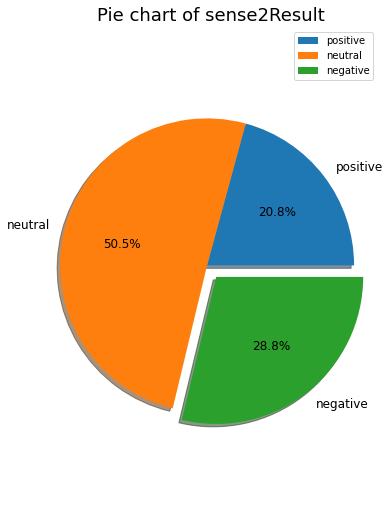

In [ ]:
import pandas as pd               # 資料處理套件
import matplotlib.pyplot as plt
plt.figure(figsize=(6,9))    # 顯示圖框架大小

labels = df['sense2Result']      # 製作圓餅圖的類別標籤
separeted = (0, 0, 0.1)                  # 依據類別數量，分別設定要突出的區塊
size = df['count']                        # 製作圓餅圖的數值來源

plt.pie(size,                           # 數值
        labels = labels,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        explode = separeted,            # 設定分隔的區塊位置
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=True)                    # 設定陰影

 
plt.axis('equal')                                          # 使圓餅圖比例相等
plt.title("Pie chart of sense2Result", {"fontsize" : 18})  # 設定標題及其文字大小
plt.legend(loc = "best")                                   # 設定圖例及其位置為最佳

# plt.savefig("Pie chart of car accident.jpg",   # 儲存圖檔
#             bbox_inches='tight',               # 去除座標軸占用的空間
#             pad_inches=0.0)                    # 去除所有白邊
# plt.close()      # 關閉圖表

## 國字轉數字

In [ ]:
numTW = ['壹','貳','參','肆','伍','陸','柒','捌','玖','拾','廿','卅','一','二','三','四','五','六','七','八','九','十',0,'１','２','３','４','５','６','７','８','９','０','佰','仟','萬','百','千'] 
numNum = [1,2,3,4,5,6,7,8,9,10,20,30,1,2,3,4,5,6,7,8,9,10,0,1,2,3,4,5,6,7,8,9,0,100,1000,10000,100,1000] 
text2num = dict(zip(numTW, numNum))

text2num['柒']

7

In [ ]:
def nds(y):
    if bool(re.search('[壹貳參肆伍陸柒捌玖拾廿卅佰百仟千萬一二三四五六七八九十１２３４５６７８９０]', y)):
        if len(y) == 1:
            return text2num[y]
        elif len(y) == 2:
            if y[1]=='拾':
                return text2num[y[0]]*10
            elif y[0] in ['拾', '廿', '卅']:
                return text2num[y[0]] + text2num[y[1]]
            else:
                return text2num[y[0]]*10 + text2num[y[1]]
        elif len(y) == 3:
            return text2num[y[0]] * text2num[y[1]] + text2num[y[2]]

        else:
            return text2num[y]
    else:
        return 0

In [ ]:
def todays(x):
  if '無期徒刑' in x:
    return 30*12
  elif '死刑' in x:
    return 40*12
  elif '年' in x or '月' in x or '日' in x:
    try:
      start = x.index("刑")
    except:
      start = 0
    try:
      y = x.index("年")
    except:
      y = 0
    try:
      m = x.index("月")
    except:
      m = 0
    try:
      d = x.index("日")
    except:
      d = 0

    if y>0:
      year = x[start+1:y] # year = x[0:y]
      if m>0:
        month = x[0+y+1:m] # month = x[0+y+1:m]
        if d>0:
          day = x[0+m+1:d] # day = x[0+m+1:d]
        else:
          day = ""
      else:
        month = ""
        if d>0:
          day = x[0+y+1:d] # day = x[0+y+1:d]
        else:
          day = ""
    else:
      year = ""
      if m>0:
        month = x[start+1:m] # month = x[0:m]
        if d>0:
          day = x[0+m+1+d-1:d] # day = x[0+m+1:d]
        else:
          day =""
      else:
        month = "" # day = x[0:d]
        day = x[0+d-1:d]

    res = nds(year)*12 + nds(month)
    return res

  else:
      return 0

In [ ]:
#鎖定累犯註記、判刑（拘役、有期徒刑）用詞
# b1 = "[，,，]*(有期徒*刑徒*|拘役)"
b1 = "[，,，]*(有期徒*刑徒*)"

#鎖定處刑用詞
c1 = "[一二三四五六七八九十壹貳參肆伍陸柒捌玖拾廿卅１２３４５６７８９０](年|個*月|日)*"
# c1 = "[一二三四五六七八九十壹貳參肆伍陸柒捌玖拾廿卅１２３４５６７８９０]*(年|個*月|日)"

#找出剝奪自由刑之模式組合
# findimprison = b1+c1
findimprison = "[，,，]*(有期徒*刑徒*)(一*二*三*四*五*六*七*八*九*十*壹*貳*參*肆*伍*陸*柒*捌*玖*拾*廿*卅*１*２*３*４*５*６*７*８*９*０*)(一*二*三*四*五*六*七*八*九*十*壹*貳*參*肆*伍*陸*柒*捌*玖*拾*廿*卅*１*２*３*４*５*６*７*８*９*０*)(一*二*三*四*五*六*七*八*九*十*壹*貳*參*肆*伍*陸*柒*捌*玖*拾*廿*卅*１*２*３*４*５*６*７*８*９*０*)(年|個*月|日)(一*二*三*四*五*六*七*八*九*十*壹*貳*參*肆*伍*陸*柒*捌*玖*拾*廿*卅*１*２*３*４*５*６*７*８*９*０*)(一*二*三*四*五*六*七*八*九*十*壹*貳*參*肆*伍*陸*柒*捌*玖*拾*廿*卅*１*２*３*４*５*６*７*８*９*０*)(年|個*月|日)*"
# findimprison = "[，,，]*(無期徒刑|死刑|(有期徒*刑徒*))(一二三四五六七八九十壹貳參肆伍陸柒捌玖拾廿卅１２３４５６７８９０)*(年|個*月|日)"

## 刑期

In [ ]:
import re
result_imprison_text = []
test = ['應執行有期徒刑拾肆年陸月','，均處有期徒刑貳拾年','應執行有期徒刑貳拾壹年，','，處有期徒刑壹年陸月，緩刑參年','無期徒刑']

for i in df['mainText']:
# for i in test:
    i = str(i)    
    if bool(re.search(findimprison, i)):
        pattern = re.compile(findimprison)
        r = pattern.findall(i)

        # print(r)

        lst = []
        for item in r:
          item = ''.join(item)
          item = str(item)
          lst.append(item)
        
        if '無期徒刑' in i:
          lst.append('無期徒刑')
        if '死刑' in i:
          lst.append('死刑')

        result_imprison_text.append(lst)

    elif '無期徒刑' in i:
      result_imprison_text.append(['無期徒刑'])
    elif '死刑' in i:
      result_imprison_text.append(['死刑'])
    else:
      result_imprison_text.append('')
print(len(result_imprison_text))

4282


In [ ]:
df["mypenalty"] = ""
df["mypenalty_int"] = ""

df['mypenalty'] = result_imprison_text

for i in range(len(df['mypenalty'])):
  num_lst = []
  lst = df['mypenalty'][i]
  for item in lst:
    st = str(item)
    # print(st)
    imprison_date = todays(st)
    num_lst.append(imprison_date)
  df['mypenalty_int'][i] = num_lst
  
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,court,date,no,reason,judgement,type,historyHash,mainText,relatedIssues,party,new_relatedIssues,new_reason,maxpenalty,year,plaintiff_lawyer,defendant_lawyer,truth,mypenalty,mypenalty_int
0,福建金門地方法院,2020-09-26T00:00:00+08:00,"108,易,28",傷害等,福建金門地方法院刑事判決 108年度易字第28號\r\n公 訴 人 福建金門地...,判決,NaN,洪繹凱犯恐嚇危害安全罪，累犯，處有期徒刑柒月，又犯傷害罪，累犯，處有期徒刑玖月，應執行有期徒...,"[{'lawName': '中華民國刑法', 'issueRef': '2'}, {'law...","[{'group': ['plaintiff'], 'title': '公訴人', 'val...","[{'lawName': '中華民國刑法', 'issueRef': '2'}, {'law...",{'公共危險罪'},365,2020,False,False,犯罪事實 一、洪繹凱因懷疑李憲瑋（涉嫌傷害罪部分，另經不起訴處分） 與其前妻有曖昧關係，竟...,"[有期徒刑柒月, 有期徒刑玖月, 有期徒刑壹年貳月, 有期徒刑參月]","[7, 9, 14, 3]"
1,福建金門地方法院,2012-08-23T00:00:00+08:00,"101,訴,6",殺人未遂,福建金門地方法院刑事判決 101年度訴字第6號\r\n公 訴 人 福建金門地方...,判決,NaN,楊子珅犯重傷未遂罪，處有期徒刑參年陸月，扣案如附表所示之物均沒收。,"[{'lawName': '中華民國刑法', 'issueRef': '25 2'}, {'...","[{'group': ['plaintiff'], 'title': '公訴人', 'val...","[{'lawName': '中華民國刑法', 'issueRef': '25 2'}, {'...","{'傷害罪', '殺人罪'}",1095,2012,False,True,犯罪事實 一、楊子珅與吳欣瑜原係臺南康寧大學（原名立德大學）之同學 兼室友，楊子珅因與女友...,[有期徒刑參年陸月],[42]
2,福建金門地方法院,2017-12-28T00:00:00+08:00,"106,侵訴,4",妨害性自主,福建金門地方法院刑事判決 106年度侵訴字第4號\r\n公 訴 人 福建金門地方...,判決,5d69b717cde13bb128573b92,乙○○現役軍人犯乘機性交罪，處有期徒刑貳年。緩刑伍年，緩刑期間付保護管束，並應於本判決確定後...,"[{'lawName': '中華民國刑法', 'issueRef': '10 5 1'}, ...","[{'group': ['plaintiff'], 'title': '公訴人', 'val...","[{'lawName': '中華民國刑法', 'issueRef': '10 5 1'}, ...","{'搶奪強盜及海盜罪', '恐嚇及擄人勒贖罪', '妨害性自主罪'}",730,2017,False,True,事 實 一、乙○○於民國100年9月20日入伍，並於102年2月16日起任職 陸軍金門防衛...,[有期徒刑貳年],[24]
3,福建金門地方法院,2017-10-06T00:00:00+08:00,"106,侵訴,2",妨害性自主,福建金門地方法院刑事判決 106年度侵訴字第2號\r\n公 訴 人 福建金門地方...,判決,5d65d481cde13bb128d61fc9,甲○○犯乘機性交罪，累犯，處有期徒刑參年貳月。,"[{'lawName': '中華民國刑法', 'issueRef': '10 5'}, {'...","[{'group': ['plaintiff'], 'title': '公訴人', 'val...","[{'lawName': '中華民國刑法', 'issueRef': '10 5'}, {'...","{'搶奪強盜及海盜罪', '恐嚇及擄人勒贖罪', '妨害性自主罪'}",1095,2017,False,True,事 實 一、甲○○於民國105 年10月18日晚上8 時許，與丁○○、丙○ ○、姓名年籍不...,[有期徒刑參年貳月],[38]
4,福建金門地方法院,2016-12-08T00:00:00+08:00,"105,侵訴,1",妨害性自主,福建金門地方法院刑事判決 105年度侵訴字第1號\r\n公 訴 人 福建金門地方...,判決,5d669863cde13bb12885d6fc,乙○○對未滿十四歲女子犯強制性交罪，處有期徒刑玖年。,"[{'lawName': '中華民國刑法', 'issueRef': '10 5'}, {'...","[{'group': ['plaintiff'], 'title': '公訴人', 'val...","[{'lawName': '中華民國刑法', 'issueRef': '10 5'}, {'...","{'搶奪強盜及海盜罪', '恐嚇及擄人勒贖罪', '妨害性自主罪'}",3285,2016,False,True,事 實 一、乙○○與代號0000000000號女子（民國95年3月生，為7歲以 上、未滿1...,[有期徒刑玖年],[108]


In [ ]:
df['maxpenalty'] = ''
for i in range(len(df['mypenalty_int'])):
  lst = df['mypenalty_int'][i]
  if lst:
    df['maxpenalty'][i] = max(lst)
  else:
    df['maxpenalty'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# df = df.drop(['judgement'], axis=1)
df = df.drop(['mypenalty', 'mypenalty_int'], axis=1)
df.head()

,court,date,no,reason,judgement,type,historyHash,mainText,relatedIssues,party,new_relatedIssues,new_reason,maxpenalty,year,plaintiff_lawyer,defendant_lawyer,truth
0,福建金門地方法院,2020-09-26T00:00:00+08:00,"108,易,28",傷害等,福建金門地方法院刑事判決 108年度易字第28號\r\n公 訴 人 福建金門地...,判決,NaN,洪繹凱犯恐嚇危害安全罪，累犯，處有期徒刑柒月，又犯傷害罪，累犯，處有期徒刑玖月，應執行有期徒...,"[{'lawName': '中華民國刑法', 'issueRef': '2'}, {'law...","[{'group': ['plaintiff'], 'title': '公訴人', 'val...","[{'lawName': '中華民國刑法', 'issueRef': '2'}, {'law...",{'公共危險罪'},14,2020,False,False,犯罪事實 一、洪繹凱因懷疑李憲瑋（涉嫌傷害罪部分，另經不起訴處分） 與其前妻有曖昧關係，竟...
1,福建金門地方法院,2012-08-23T00:00:00+08:00,"101,訴,6",殺人未遂,福建金門地方法院刑事判決 101年度訴字第6號\r\n公 訴 人 福建金門地方...,判決,NaN,楊子珅犯重傷未遂罪，處有期徒刑參年陸月，扣案如附表所示之物均沒收。,"[{'lawName': '中華民國刑法', 'issueRef': '25 2'}, {'...","[{'group': ['plaintiff'], 'title': '公訴人', 'val...","[{'lawName': '中華民國刑法', 'issueRef': '25 2'}, {'...","{'傷害罪', '殺人罪'}",42,2012,False,True,犯罪事實 一、楊子珅與吳欣瑜原係臺南康寧大學（原名立德大學）之同學 兼室友，楊子珅因與女友...
2,福建金門地方法院,2017-12-28T00:00:00+08:00,"106,侵訴,4",妨害性自主,福建金門地方法院刑事判決 106年度侵訴字第4號\r\n公 訴 人 福建金門地方...,判決,5d69b717cde13bb128573b92,乙○○現役軍人犯乘機性交罪，處有期徒刑貳年。緩刑伍年，緩刑期間付保護管束，並應於本判決確定後...,"[{'lawName': '中華民國刑法', 'issueRef': '10 5 1'}, ...","[{'group': ['plaintiff'], 'title': '公訴人', 'val...","[{'lawName': '中華民國刑法', 'issueRef': '10 5 1'}, ...","{'搶奪強盜及海盜罪', '恐嚇及擄人勒贖罪', '妨害性自主罪'}",24,2017,False,True,事 實 一、乙○○於民國100年9月20日入伍，並於102年2月16日起任職 陸軍金門防衛...
3,福建金門地方法院,2017-10-06T00:00:00+08:00,"106,侵訴,2",妨害性自主,福建金門地方法院刑事判決 106年度侵訴字第2號\r\n公 訴 人 福建金門地方...,判決,5d65d481cde13bb128d61fc9,甲○○犯乘機性交罪，累犯，處有期徒刑參年貳月。,"[{'lawName': '中華民國刑法', 'issueRef': '10 5'}, {'...","[{'group': ['plaintiff'], 'title': '公訴人', 'val...","[{'lawName': '中華民國刑法', 'issueRef': '10 5'}, {'...","{'搶奪強盜及海盜罪', '恐嚇及擄人勒贖罪', '妨害性自主罪'}",38,2017,False,True,事 實 一、甲○○於民國105 年10月18日晚上8 時許，與丁○○、丙○ ○、姓名年籍不...
4,福建金門地方法院,2016-12-08T00:00:00+08:00,"105,侵訴,1",妨害性自主,福建金門地方法院刑事判決 105年度侵訴字第1號\r\n公 訴 人 福建金門地方...,判決,5d669863cde13bb12885d6fc,乙○○對未滿十四歲女子犯強制性交罪，處有期徒刑玖年。,"[{'lawName': '中華民國刑法', 'issueRef': '10 5'}, {'...","[{'group': ['plaintiff'], 'title': '公訴人', 'val...","[{'lawName': '中華民國刑法', 'issueRef': '10 5'}, {'...","{'搶奪強盜及海盜罪', '恐嚇及擄人勒贖罪', '妨害性自主罪'}",108,2016,False,True,事 實 一、乙○○與代號0000000000號女子（民國95年3月生，為7歲以 上、未滿1...


In [ ]:
import numpy
numpy.mean(df['maxpenalty'])

34.4070527790752

In [ ]:
df.to_csv('0810.csv')

# Articut
## add Penalty

In [ ]:
username = "wwdu@gapp.nthu.edu.tw"
apikey = "xxxxxxx"
articut = Articut(username, apikey)

In [ ]:
df["penalty"] = ""

In [ ]:
inputSTR = "楊進勝犯血液中酒精濃度達百分之零點零五以上而駕駛動力交通工具罪，處有期徒刑參月，如易科罰金，以新臺幣壹仟元折算壹日。被告楊進勝所為，係犯刑法第185 條之3 第1項第1 款之血液中酒精濃度達百分之0.05以上而駕駛動力交通工具罪。"

result = articut.parse(inputSTR)
penaltyLIST = articut.LawsToolkit.getPenalty(result)
print(penaltyLIST)

getCriminalResponsibility() To be deprecated soon.
['有期徒刑參月']


In [ ]:
for i in range(len(df)):
  inputSTR = df['mainText'][i]
  inputSTR = str(inputSTR)
  # print(inputSTR)
  if inputSTR:
    result = articut.parse(inputSTR)
    print(inputSTR)
    penaltyLIST = articut.LawsToolkit.getPenalty(result)
    df['penalty'][i] = penaltyLIST
    print(penaltyLIST)

In [ ]:
df.to_csv("add_penalty")